In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets_intern/merged_BJP_INC_new (1).csv')

In [ ]:
print(data.head())
print(data.info())


  Party                                              Tweet     handle
0   BJP  RT : VIDEO | Jharkhand Assembly Elections 2024...  amarbauri
1   BJP  || जीवेत शरदः शतम् || केंद्रीय गृह एवं सहकारित...  amarbauri
2   BJP  जुड़ेंगे और जीतेंगे, जीत ऐतिहासिक होगी ! अपनों...  amarbauri
3   BJP  हिंदू "बटेंगे तो कटेंगे" का असली अर्थ समझिए .....  amarbauri
4   BJP  चंदनकियारी चौक ⏩ नेताजी सुभाष चंद्र बोस के सशक...  amarbauri
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41619 entries, 0 to 41618
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Party   41619 non-null  object
 1   Tweet   41492 non-null  object
 2   handle  41619 non-null  object
dtypes: object(3)
memory usage: 975.6+ KB
None


In [ ]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[\W_]+', ' ', text)
    text = text.lower().strip()
    return text

data['cleaned_tweet'] = data['Tweet'].apply(clean_text)

In [ ]:
# Step 3: Tokenization and Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_tweet']).toarray()

In [ ]:
# Encode labels (assuming BJP = 0, INC = 1)
data['label'] = data['Party'].map({'BJP': 0, 'INC': 1})

In [ ]:

data = data.dropna(subset=['label', 'cleaned_tweet'])
y = data['label']

<ipython-input-27-81c8360f5285>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['Party'], palette={"BJP": "#FF7F50", "INC": "#1E90FF"})


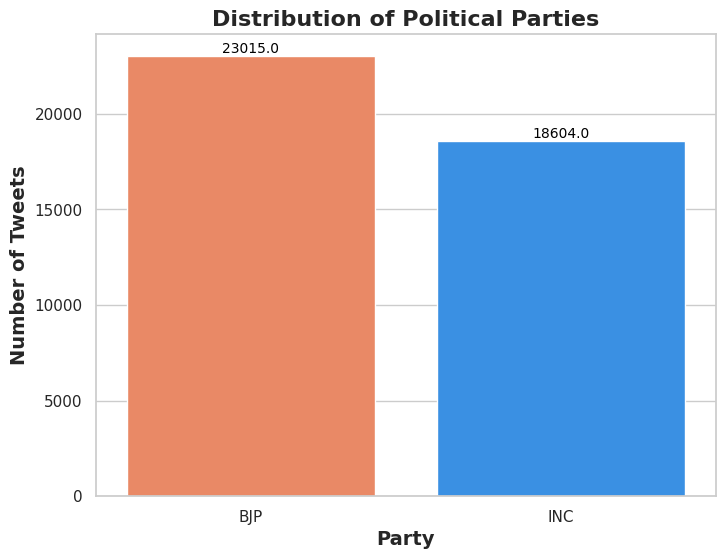

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

ax = sns.countplot(x=data['Party'], palette={"BJP": "#FF7F50", "INC": "#1E90FF"})

plt.title('Distribution of Political Parties', fontsize=16, fontweight='bold')
plt.xlabel('Party', fontsize=14, fontweight='bold')
plt.ylabel('Number of Tweets', fontsize=14, fontweight='bold')

for p in ax.patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 fontsize=10, color='black',
                 xytext=(0, 5), textcoords='offset points')

plt.show()


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Model Selection and Training
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Step 6: Model Evaluation
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      4675
           1       0.77      0.74      0.76      3649

    accuracy                           0.79      8324
   macro avg       0.79      0.78      0.79      8324
weighted avg       0.79      0.79      0.79      8324

Confusion Matrix:
 [[3868  807]
 [ 940 2709]]


In [ ]:
# Test with New Data
def predict_political_leaning(new_texts):
    cleaned_texts = [clean_text(text) for text in new_texts]
    features = vectorizer.transform(cleaned_texts).toarray()
    predictions = model.predict(features)
    return ['BJP' if pred == 0 else 'INC' for pred in predictions]

In [ ]:
new_tweets = ["India is progressing fast!", "We need to improve education policies."]
predictions = predict_political_leaning(new_tweets)
print("Predictions:", predictions)

Predictions: ['INC', 'INC']


<ipython-input-30-7319fb43fed6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Party', y='tweet_length', data=data, palette={"BJP": "#FF7F50", "INC": "#1E90FF"})


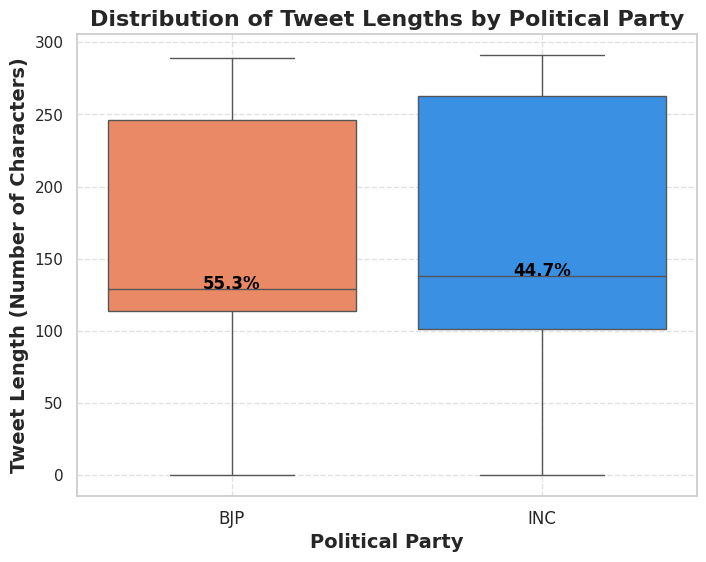

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Create the boxplot without palette directly
ax = sns.boxplot(x='Party', y='tweet_length', data=data, palette={"BJP": "#FF7F50", "INC": "#1E90FF"})

plt.title('Distribution of Tweet Lengths by Political Party', fontsize=16, fontweight='bold')
plt.xlabel('Political Party', fontsize=14, fontweight='bold')
plt.ylabel('Tweet Length (Number of Characters)', fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks([0, 1], ['BJP', 'INC'], fontsize=12)

# Calculate the percentage of total tweets for each party
total_tweets = len(data)
bjp_tweets = len(data[data['Party'] == 'BJP'])
inc_tweets = len(data[data['Party'] == 'INC'])

bjp_percentage = (bjp_tweets / total_tweets) * 100
inc_percentage = (inc_tweets / total_tweets) * 100

# Calculate the positions for text annotations
bjp_box = data[data['Party'] == 'BJP']['tweet_length']
inc_box = data[data['Party'] == 'INC']['tweet_length']

# Add percentage annotation inside the boxes
ax.text(0, bjp_box.median(), f'{bjp_percentage:.1f}%', horizontalalignment='center', fontsize=12, fontweight='bold', color='black')
ax.text(1, inc_box.median(), f'{inc_percentage:.1f}%', horizontalalignment='center', fontsize=12, fontweight='bold', color='black')

# Add styling for the box elements
for flier in ax.artists:
    flier.set_edgecolor('black')
    flier.set_facecolor('red')

plt.show()
